In [1]:
# Importando bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Modules.Helper import Helper
from Modules.Solvers import Solvers
from Modules.Plotters import Plotters
import pandas as pd
from Modules.Equation import Equation

In [2]:
labels = ['A', 'B', 'C', 'D', 'E']
df, max_data = Helper.load_data(filename='Data/GRN5_DATA.txt', labels=labels)
initial_conditions = np.array([df[label].iloc[0] for label in labels])
t_span = (df['t'].iloc[0], df['t'].iloc[-1])  # Intervalo de tempo para simulações
t_eval = np.array(df['t'])  # Ponto de avaliação dos dados temporais
original = np.array(df[labels]).T  # Dados originais

c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\MethodsAnalysis\Modules\Helper.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['t'] + labels)


In [3]:
# Melhor Indivíduo CMAES
coeffs={
    'A': {
        'E': {'n': 10.237611316210982, 'k': 0.653464971462323, '-': True}, 
        'tau': 1.5398906533829366
        }, 
    'B': {
        'A': {'n': 6.701514577177078, 'k': 0.5321271271145982, '-': False}, 
        'tau': 2.099943026899326
        }, 
    'C': {
        'B': {'n': 2.70642030360658, 'k': 0.3643670348885463, '-': False}, 
        'tau': 1.5768281296688946
        }, 
    'D': {
        'C': {'n': 5.594897802097363, 'k': 0.5587273348199578, '-': False}, 
        'tau': 2.5506006896094817
        }, 
    'E': {
        'D': {'n': 3.476175653127073, 'k': 0.10166946225443736, '-': False}, 
        'B': {'n': 5.959333815247865, 'k': 0.67850151262851, '-': False}, 
        'E': {'n': 5.171520427553738, 'k': 0.8728202085546947, '-': False}, 
        'tau': 2.9575298232470577
        }
    }

In [4]:
# # Melhor Indivíduo DE

# coeffs={
#     'A': {
#         'E': {'n': 16.333044657328724, 'k': 0.6545902609320426, '-': True}, 
#         'tau': 1.5742515334889255
#         }, 
#     'B': {
#         'A': {'n': 5.226916738086299, 'k': 0.5320317548194631, '-': False}, 
#         'tau': 1.969600235769545
#         }, 
#     'C': {
#         'B': {'n': 2.7062106427128523, 'k': 0.34635746179267124, '-': False}, 
#         'tau': 1.408144139197128
#         }, 
#     'D': {
#         'C': {'n': 5.7056032910177805, 'k': 0.5688530926459094, '-': False}, 
#         'tau': 2.688719528738614
#         }, 
#     'E': {
#         'D': {'n': 1.9931505748148055, 'k': 0.2737296394345984, '-': False}, 
#         'B': {'n': 4.2954684902097355, 'k': 0.4494948560066664, '-': False}, 
#         'E': {'n': 5.467317946300433, 'k': 0.8141913256906291, '-': False}, 
#         'tau': 2.3910687889897777
#         }
#     }

In [5]:
equation = Equation(coefficients=coeffs, labels=labels)

def system(t, y, equation):
        vals = [Solvers.norm_hardcoded(val, max_data[label]) for val, label in zip(y, labels)]
        N_A, N_B, N_C, N_D, N_E = vals
        
        dA = equation.full_eq(vals, 'A', 'E')
        dB = equation.full_eq(vals, 'B', 'A')
        dC = equation.full_eq(vals, 'C', 'B')
        dD = equation.full_eq(vals, 'D', 'C')
        dE = equation.complex_eqs(vals, 'E', [['+B', '+D'], ['+D', '+E']])

        return [dA, dB, dC, dD, dE]

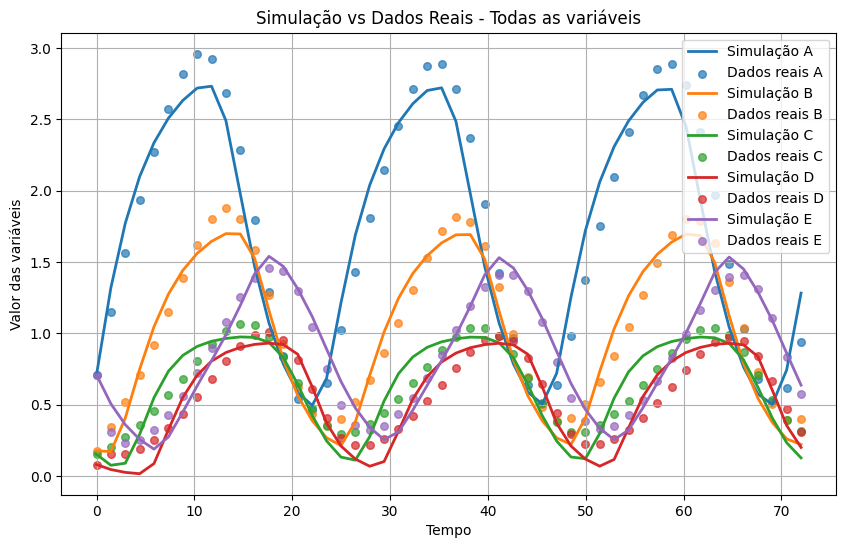

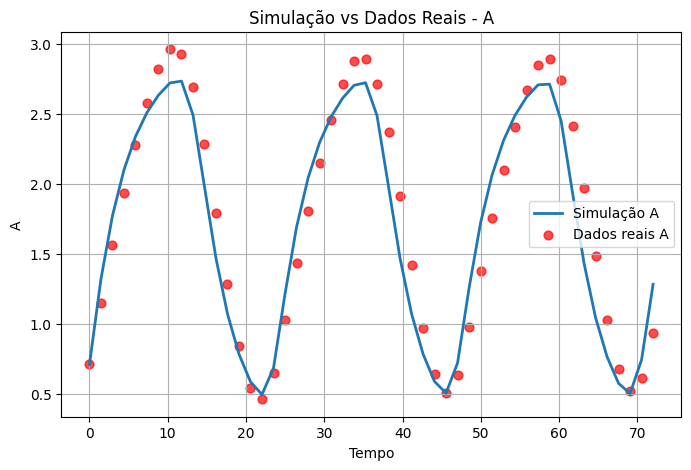

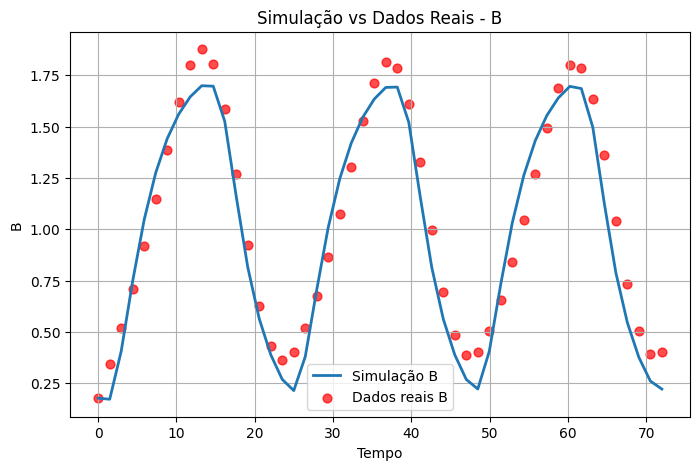

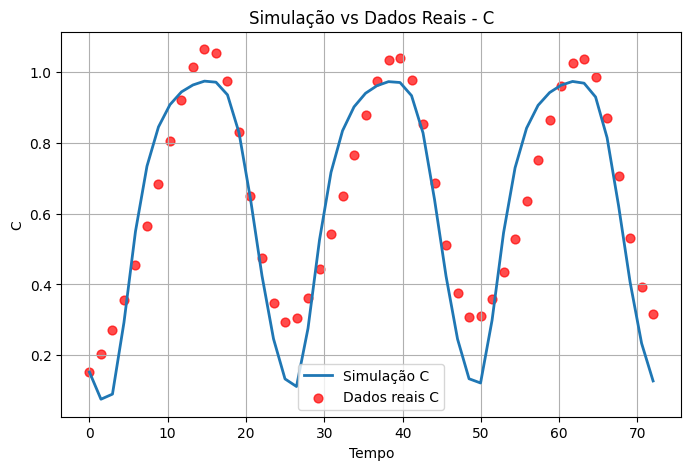

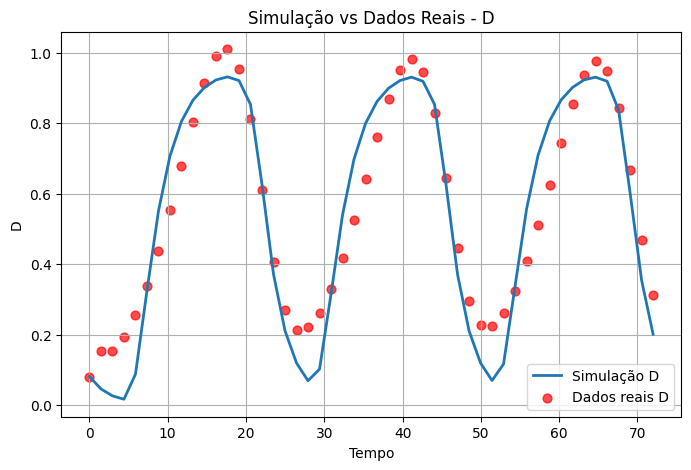

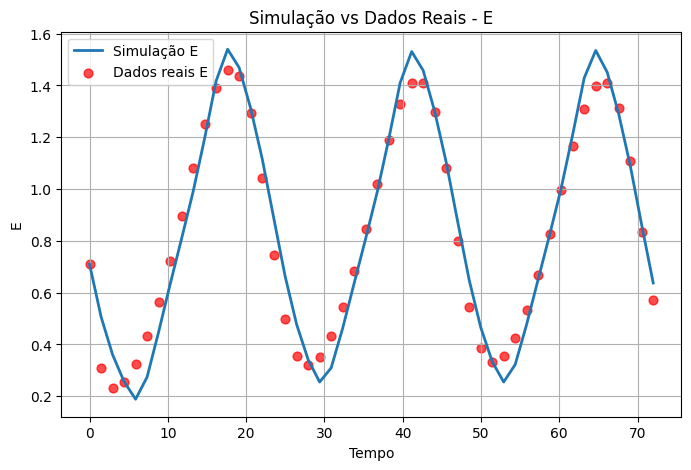

In [6]:
results = {}
methods = ['RK45']

for method in methods:
    results[method] = solve_ivp(
        system, t_span, initial_conditions,
        method=method, t_eval=t_eval, args=(equation,)
    ).y
    
    # --------- Gráfico com todas as curvas juntas ---------
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(labels):
        plt.plot(t_eval, results[method][i], label=f'Simulação {label}', linewidth=2)
        plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=30, alpha=0.7)
    plt.legend()
    plt.xlabel("Tempo")
    plt.ylabel("Valor das variáveis")
    plt.title(f"Simulação vs Dados Reais - Todas as variáveis")
    plt.grid(True)
    plt.show()

    # --------- Gráfico individual para cada curva ---------
    for i, label in enumerate(labels):
        plt.figure(figsize=(8, 5))
        plt.plot(t_eval, results[method][i], label=f'Simulação {label}', linewidth=2)
        plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=40, alpha=0.7, color="red")
        plt.legend()
        plt.xlabel("Tempo")
        plt.ylabel(f"{label}")
        plt.title(f"Simulação vs Dados Reais - {label}")
        plt.grid(True)
        plt.show()

c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\MethodsAnalysis\Modules\Equation.py:12: RuntimeWarning: invalid value encountered in scalar power
  result = (val**nval / (val**nval + kval**nval))


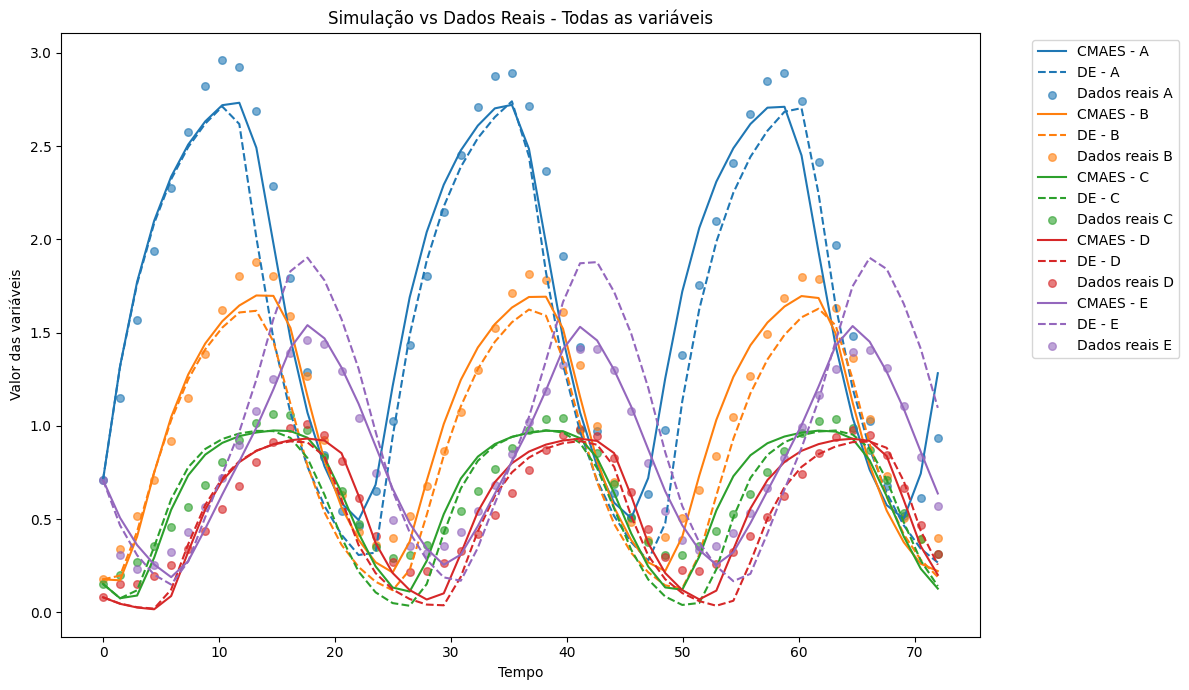

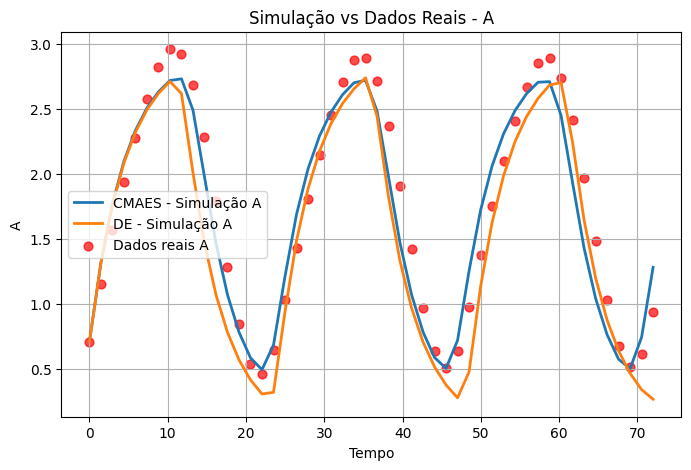

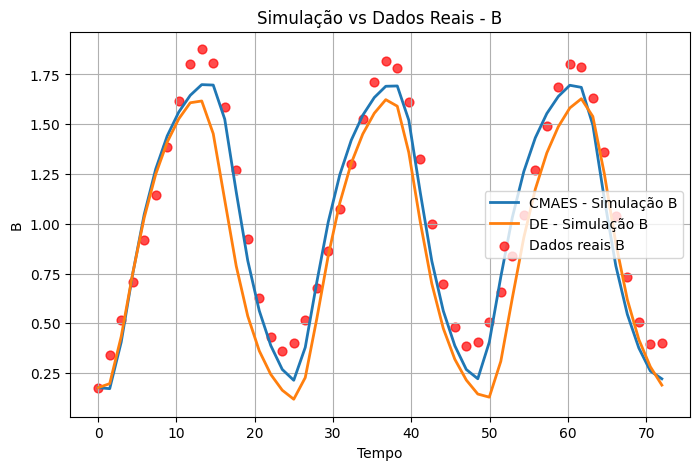

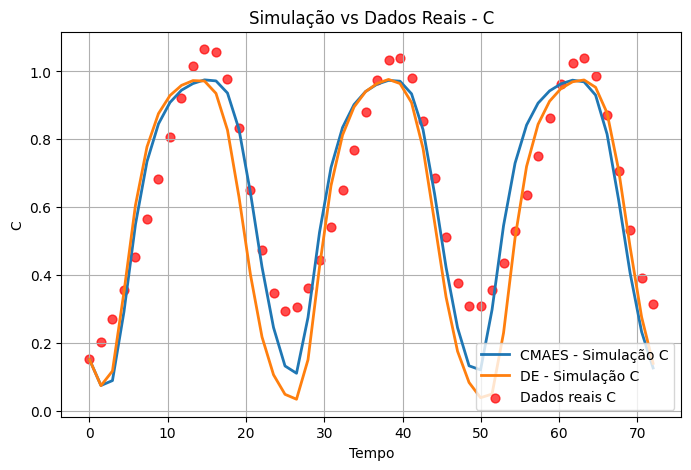

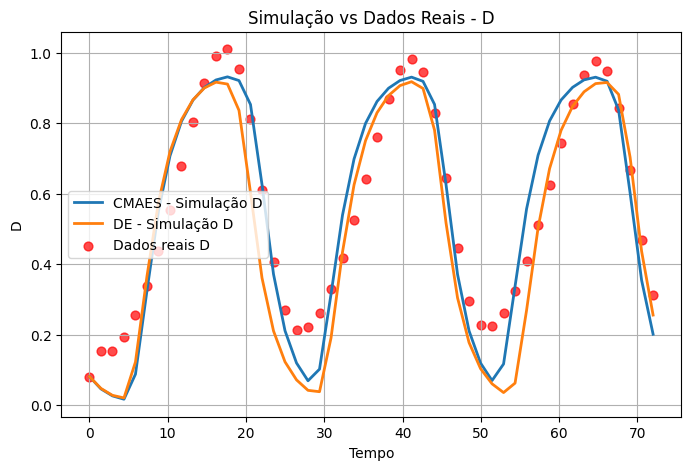

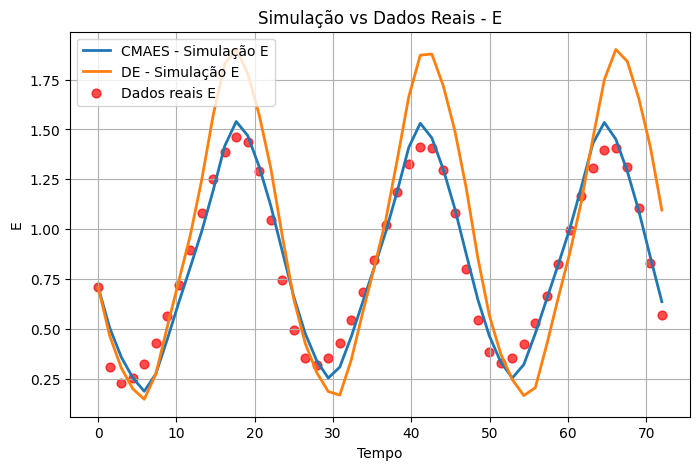

In [8]:
# Dicionário com os dois conjuntos de coeficientes
coeffs_dict = {
    "CMAES": {
        'A': {
            'E': {'n': 10.237611316210982, 'k': 0.653464971462323, '-': True}, 
            'tau': 1.5398906533829366
             }, 
        'B': {
            'A': {'n': 6.701514577177078, 'k': 0.5321271271145982, '-': False}, 
            'tau': 2.099943026899326
            }, 
        'C': {
            'B': {'n': 2.70642030360658, 'k': 0.3643670348885463, '-': False}, 
            'tau': 1.5768281296688946
            }, 
        'D': {
            'C': {'n': 5.594897802097363, 'k': 0.5587273348199578, '-': False}, 
            'tau': 2.5506006896094817
            }, 
        'E': {
            'D': {'n': 3.476175653127073, 'k': 0.10166946225443736, '-': False}, 
            'B': {'n': 5.959333815247865, 'k': 0.67850151262851, '-': False}, 
            'E': {'n': 5.171520427553738, 'k': 0.8728202085546947, '-': False}, 
            'tau': 2.9575298232470577
            }
    },
    "DE": {
        'A': {
            'E': {'n': 16.333044657328724, 'k': 0.6545902609320426, '-': True}, 
            'tau': 1.5742515334889255
            }, 
        'B': {
            'A': {'n': 5.226916738086299, 'k': 0.5320317548194631, '-': False}, 
            'tau': 1.969600235769545
            }, 
        'C': {
            'B': {'n': 2.7062106427128523, 'k': 0.34635746179267124, '-': False}, 
            'tau': 1.408144139197128
            }, 
        'D': {
            'C': {'n': 5.7056032910177805, 'k': 0.5688530926459094, '-': False}, 
            'tau': 2.688719528738614
            }, 
        'E': {
            'D': {'n': 1.9931505748148055, 'k': 0.2737296394345984, '-': False}, 
            'B': {'n': 4.2954684902097355, 'k': 0.4494948560066664, '-': False}, 
            'E': {'n': 5.467317946300433, 'k': 0.8141913256906291, '-': False}, 
            'tau': 2.3910687889897777
            }
    }
}

# Rodar as simulações para cada conjunto
results = {}
for name, coeffs in coeffs_dict.items():
    equation = Equation(coefficients=coeffs, labels=labels)
    sol = solve_ivp(
        system, t_span, initial_conditions,
        method="RK45", t_eval=t_eval, args=(equation,)
    )
    results[name] = sol.y

# --------- Gráfico com todas as curvas juntas (CMAES contínuo, DE tracejado) ---------
import matplotlib.pyplot as plt

# Paleta discreta com cores bem distintas
palette = plt.get_cmap("tab10").colors  # até 10 cores bem diferentes
# Se tiver mais que 10 labels, dá pra usar "tab20" ou misturar paletas

# --------- Gráfico com todas as curvas juntas ---------
plt.figure(figsize=(12, 7))
for i, label in enumerate(labels):
    color = palette[i % len(palette)]  # garante repetição caso tenha >10 labels

    # CMAES (linha contínua)
    plt.plot(t_eval, results["CMAES"][i], label=f'CMAES - {label}', linestyle='-', color=color)

    # DE (linha tracejada)
    plt.plot(t_eval, results["DE"][i], label=f'DE - {label}', linestyle='--', color=color)

    # Dados reais (pontos)
    plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=30, alpha=0.6, color=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Tempo")
plt.ylabel("Valor das variáveis")
plt.title("Simulação vs Dados Reais - Todas as variáveis")
plt.grid(False)
plt.tight_layout()
plt.show()


# --------- Gráfico individual para cada curva ---------
for i, label in enumerate(labels):
    plt.figure(figsize=(8, 5))
    for name, sol in results.items():
        plt.plot(t_eval, sol[i], label=f'{name} - Simulação {label}', linewidth=2)
    plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=40, alpha=0.7, color="red")
    plt.legend()
    plt.xlabel("Tempo")
    plt.ylabel(f"{label}")
    plt.title(f"Simulação vs Dados Reais - {label}")
    plt.grid(True)
    plt.show()
